# Detection dataset

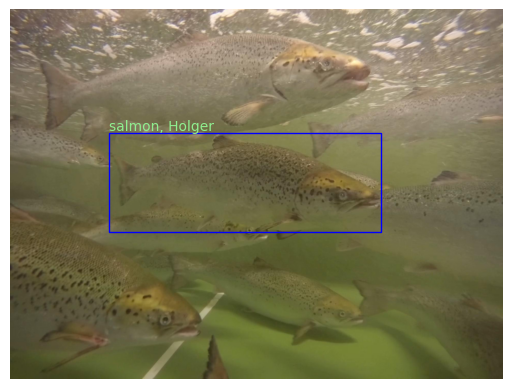

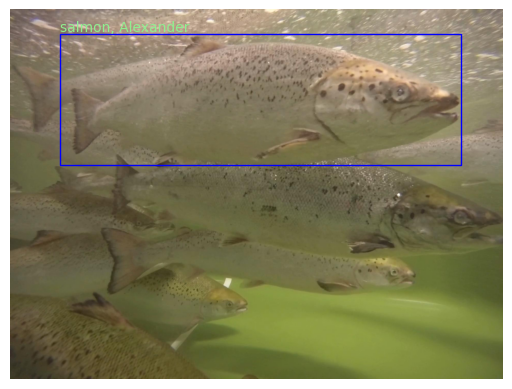

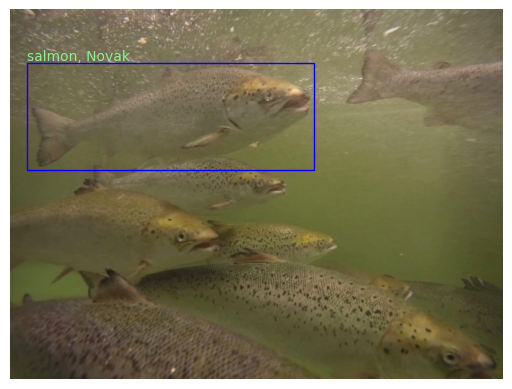

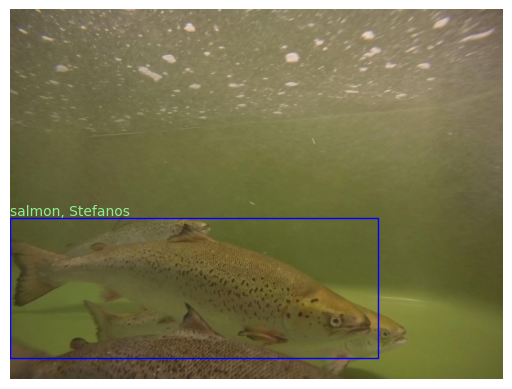

In [25]:
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

from_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Laks_Deteksjonssett/"

# Good example
annots = ["Boxes/GP020101_00005879.json", "Boxes/GP010101_00007941.json", "Boxes/GOPR0101_00021057.json", "Boxes/GP010022_00024695.json"]
imgs = ["Images/GP020101_00005879.jpg", "Images/GP010101_00007941.jpg", "Images/GOPR0101_00021057.jpg", "Images/GP010022_00024695.jpg"]

names = {3:'Novak', 5:'Jannik', 7:'Casper', 9:'Holger', 10:'Roger', 17:'Alexander', 19:'Stefanos', 20:'Daniil'}

for i in range(len(imgs)):
    img = cv2.cvtColor(cv2.imread(from_path + imgs[i], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    
    with open(from_path + annots[i], 'r') as file:
        content = json.load(file)
        shapes = content['shapes']
        
        fig, ax = plt.subplots()
        ax.imshow(img)
        
        for shape in shapes:
            if shape['shape_type'] == 'point':
                point = shape['points']
                x = float(point[0][0])
                y = float(point[0][1])
                ax.plot(x, y, 'yo')  # Plotting red circles for points

            if shape['shape_type'] == 'rectangle':
                box = shape['points']
                label = shape['label']
                id = shape['group_id']
                
                x1 = float(box[0][0])
                y1 = float(box[0][1])
                x2 = float(box[1][0])
                y2 = float(box[1][1])
                # Plotting rectangle
                rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='blue', facecolor='none')
                ax.add_patch(rect)
                ax.text(x1, y1 - 10, f'{label}, {names[id]}', color='lightgreen', fontsize=10)


        ax.axis('off')
        plt.show()

# Body part and keypoint dataset

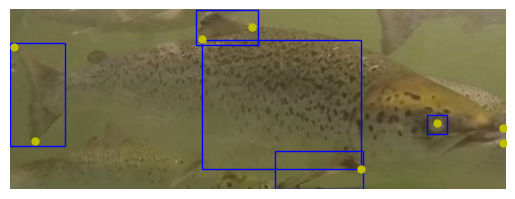

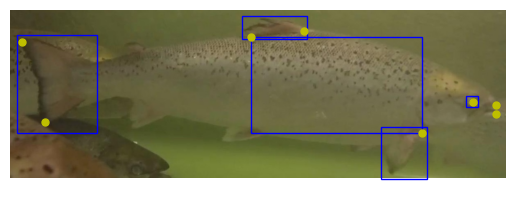

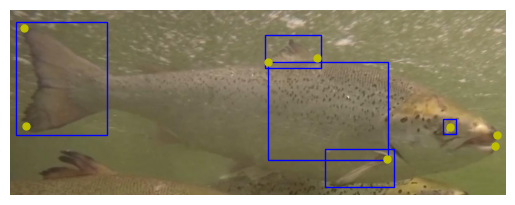

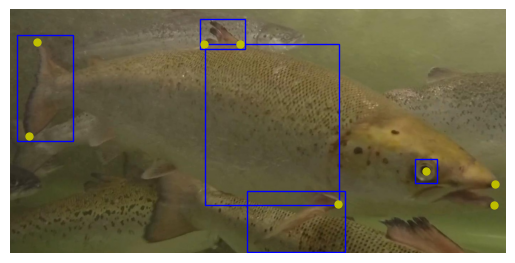

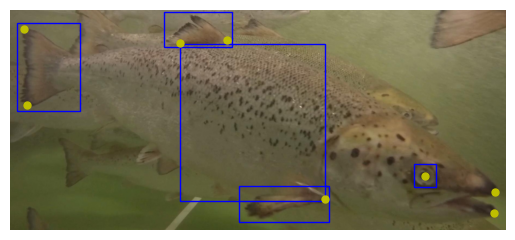

In [22]:
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

from_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Laks_kroppsdeler_Deteksjonssett/"

# Good example
annots = ["fish9/fish9_GP020101_00005879.json", "fish10/fish10_GOPR0101_00017244.json", "fish3/fish3_GOPR0101_00020757.json", "fish5/fish5_GOPR0101_00016674.json", "fish17/fish17_GOPR0101_00003555.json"]
imgs = ["fish9/fish9_GP020101_00005879.jpg", "fish10/fish10_GOPR0101_00017244.jpg", "fish3/fish3_GOPR0101_00020757.jpg", "fish5/fish5_GOPR0101_00016674.jpg", "fish17/fish17_GOPR0101_00003555.jpg"]

for i in range(len(imgs)):
    img = cv2.cvtColor(cv2.imread(from_path + imgs[i], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    
    with open(from_path + annots[i], 'r') as file:
        content = json.load(file)
        shapes = content['shapes']
        
        fig, ax = plt.subplots()
        ax.imshow(img)
        
        for shape in shapes:
            if shape['shape_type'] == 'point':
                point = shape['points']
                x = float(point[0][0])
                y = float(point[0][1])
                ax.plot(x, y, 'yo', markersize=5)  # Plotting red circles for points

            if shape['shape_type'] == 'rectangle':
                box = shape['points']
                x1 = float(box[0][0])
                y1 = float(box[0][1])
                x2 = float(box[1][0])
                y2 = float(box[1][1])
                # Plotting rectangle
                rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='blue', facecolor='none')
                ax.add_patch(rect)

        ax.axis('off')
        plt.show()
